In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/prashanthrapaka/Downloads/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

Handling Missing Values: Identify and briefly describe the strategy to handle missing values in each dataset.


Removal of Duplicates: Briefly explain how you would identify and remove duplicate entries in each dataset.


Removal of Outliers - Using IQR Method: Provide a concise overview of how the Interquartile Range (IQR) method would be applied to detect and remove outliers in each dataset.

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms'].agg(['mean','median'])

mean      537.870553
median    435.000000
Name: total_bedrooms, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


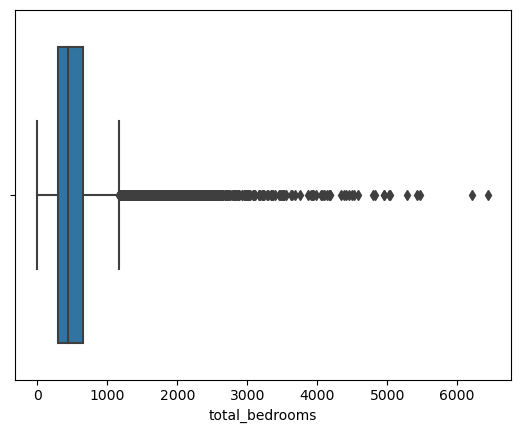

In [9]:
sns.boxplot(x=df['total_bedrooms'])
plt.show()

In [10]:
Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['total_bedrooms'] < Q1 - threshold * IQR) | (df['total_bedrooms'] > Q3 + threshold * IQR)]

num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")


Number of outliers: 1271


In [11]:
df['total_bedrooms'].count()

20433

In [12]:
#As there are 6% of outliers median is best for filling missing values
df.fillna(df.median(), inplace=True)

/var/folders/gq/nc9zyzdj53x_hjjgn5gxj4500000gn/T/ipykernel_86869/2116954530.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [13]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64